<a href="https://colab.research.google.com/github/daudkaleb29/TugasMachineLearning/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hotel Reservation

Dataset Link: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DaudKaleb/TM9/dataset/Hotel Reservations.csv', delimiter=',')

In [4]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
for val in df.columns:
    print(f'{val}: {df[val].unique()}')

Booking_ID: ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
no_of_adults: [2 1 3 0 4]
no_of_children: [ 0  2  1  3 10  9]
no_of_weekend_nights: [1 2 0 4 3 6 5 7]
no_of_week_nights: [ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]
type_of_meal_plan: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
required_car_parking_space: [0 1]
room_type_reserved: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
lead_time: [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182 116 123 105 443 317 286 148  14  85  25
  28  80  11 162  82  27 245 266 112  88  69 273   4  97  31  62 197 280
 185 160 104  22 292 109 126 303  81  54  15 161 147  87 

In [6]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [8]:
df['no_of_people'] = df['no_of_adults'] + df['no_of_children']

In [9]:
df1 = df.drop(['Booking_ID',
         'no_of_adults',
         'no_of_children',
         'no_of_weekend_nights',
         'no_of_week_nights',
         'type_of_meal_plan',
         'lead_time',
         'arrival_year',
         'arrival_month',
         'arrival_date',
         'market_segment_type',
         'no_of_previous_cancellations',
         'no_of_previous_bookings_not_canceled'], axis=1).copy()

In [10]:
df1.head()

,required_car_parking_space,room_type_reserved,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status,no_of_people
0,0,Room_Type 1,0,65.00,0,Not_Canceled,2
1,0,Room_Type 1,0,106.68,1,Not_Canceled,2
2,0,Room_Type 1,0,60.00,0,Canceled,1
3,0,Room_Type 1,0,100.00,0,Canceled,2
4,0,Room_Type 1,0,94.50,0,Canceled,2


In [11]:
le = LabelEncoder()
df1['room_type_reserved'] = le.fit_transform(df1['room_type_reserved'])

In [12]:
status = {'Not_Canceled': 0, 'Canceled': 1}
df1['booking_status'] = df1['booking_status'].map(status)

In [13]:
min_max = MinMaxScaler()
df1[['avg_price_per_room']] = min_max.fit_transform(df1[['avg_price_per_room']])

In [14]:
df1.head()

,required_car_parking_space,room_type_reserved,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status,no_of_people
0,0,0,0,0.120370,0,0,2
1,0,0,0,0.197556,1,0,2
2,0,0,0,0.111111,0,1,1
3,0,0,0,0.185185,0,1,2
4,0,0,0,0.175000,0,1,2


In [15]:
df1.dtypes

required_car_parking_space      int64
room_type_reserved              int64
repeated_guest                  int64
avg_price_per_room            float64
no_of_special_requests          int64
booking_status                  int64
no_of_people                    int64
dtype: object

In [16]:
X = df1.drop('booking_status', axis=1)
y = df1['booking_status']

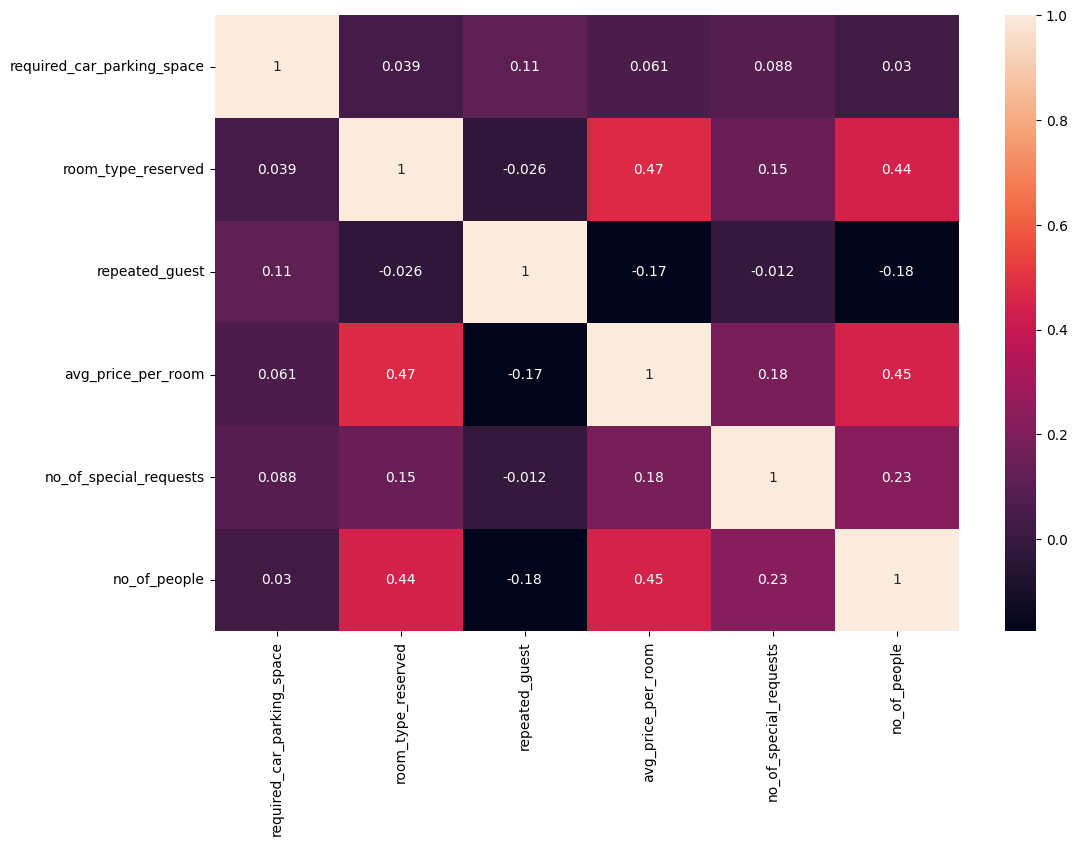

In [17]:
plt.figure(figsize=(12, 8))
corr = X.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [18]:
def eliminate_feature(corr):
    res = []
    for i in range(len(corr.columns)):
        for j in range(len(corr.columns)):
            if abs(corr.iloc[i, j]) > 0.5 and i != j:
                res.append(corr.iloc[i, j])
    return res

In [19]:
res = eliminate_feature(corr)
print(res)

[]


In [20]:
df1 = df1.drop([res], axis=1) if len(res) > 0 else df1

In [21]:
df1

,required_car_parking_space,room_type_reserved,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status,no_of_people
0,0,0,0,0.120370,0,0,2
1,0,0,0,0.197556,1,0,2
2,0,0,0,0.111111,0,1,1
3,0,0,0,0.185185,0,1,2
4,0,0,0,0.175000,0,1,2
...,...,...,...,...,...,...,...
36270,0,3,0,0.310741,1,0,3
36271,0,0,0,0.168426,2,1,2
36272,0,0,0,0.182204,2,0,2
36273,0,0,0,0.175000,0,1,2


In [22]:
model_params = {
    'sgd': {
        'model': SGDClassifier(),
        'params': {
            'loss': ['log', 'log_loss'],
            'penalty': ['l1', 'l2'],
            'learning_rate': ['constant', 'optimal']
        }
    },
    'knn': {
        'model': KNeighborsClassifier(n_neighbors=10),
        'params': {
            'weights': ['uniform', 'distance']
        }
    },
    'rf': {
        'model': RandomForestClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss']
        }
    },
    'tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'max_depth': [20, 25]
        }
    }

}

In [23]:
score_model = []

for nama_model, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=8, return_train_score=False)
    clf.fit(X, y)
    score_model.append({
        'model': nama_model,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [24]:
df_res = pd.DataFrame(score_model, columns=['model', 'best_score', 'best_params'])

In [25]:
df_res

,model,best_score,best_params
0,sgd,0.694610,"{'learning_rate': 'optimal', 'loss': 'log', 'p..."
1,knn,0.774666,{'weights': 'distance'}
2,rf,0.776595,{'criterion': 'log_loss'}
3,tree,0.776513,"{'criterion': 'entropy', 'max_depth': 25}"


In [26]:
df_res.sort_values(by=['best_score'], ascending=False)

,model,best_score,best_params
2,rf,0.776595,{'criterion': 'log_loss'}
3,tree,0.776513,"{'criterion': 'entropy', 'max_depth': 25}"
1,knn,0.774666,{'weights': 'distance'}
0,sgd,0.694610,"{'learning_rate': 'optimal', 'loss': 'log', 'p..."
